<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/%EC%96%91%EC%9E%90%EC%97%B0%EC%82%B0%EC%9A%94%EC%95%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
!python3 -m pip install qiskit[visualization]
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**양자 연산 요약**

In [95]:
# Useful additional packages
import matplotlib.pyplot as plt
import numpy as np
from math import pi

In [96]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer

backend = BasicAer.get_backend(name='unitary_simulator')

**단일 큐빗 게이트**


* U 게이트
* P 게이트
* Identity 게이트
* Pauli 게이트
* Clifford 게이트
* C3 게이트 
* 표준 회전(Standard rotation) 게이트

In [97]:
q = QuantumRegister(size=1)

**U 게이트**

In [98]:
qc = QuantumCircuit(q)
qc.u(pi/2, pi/4, pi/8, q)
qc.draw()

┌────────────────┐
q38: ┤ U(π/2,π/4,π/8) ├
     └────────────────┘

In [99]:
job = backend.run(qobj=transpile(circuits=qc, backend=backend))
job.result().get_unitary(qc, decimals=3)

array([[ 0.707+0.j   , -0.653-0.271j],
       [ 0.5  +0.5j  ,  0.271+0.653j]])

In [100]:
# qc.u1(lambda) is now:
#qc.p(lambda)

# qc.u2(phi, lambda) is now:
#qc.u(pi/2, phi, lambda)

# qc.u3(theta, phi, lambda) is now:
#qc.u(theta, phi, lambda)

**P 게이트**

In [101]:
qc = QuantumCircuit(q)
qc.p(theta=pi/2, qubit=q)
qc.draw()

┌────────┐
q38: ┤ P(π/2) ├
     └────────┘

In [102]:
job = backend.run(qobj=transpile(circuits=qc, backend=backend))
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+1.j]])

**항등(identity) 게이트**

In [103]:
qc = QuantumCircuit(q)
qc.id(qubit=q)
qc.draw()

┌───┐
q38: ┤ I ├
     └───┘

In [104]:
job = backend.run(qobj=transpile(circuits=qc, backend=backend))
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]])

**파울리(Pauli) 게이트**
X: 비트 플립 게이트

In [105]:
qc = QuantumCircuit(q)
qc.x(qubit=q)
qc.draw()

┌───┐
q38: ┤ X ├
     └───┘

In [106]:
job = backend.run(qobj=transpile(circuits=qc, backend=backend))
job.result().get_unitary(qc, decimals=3)

array([[0.+0.j, 1.+0.j],
       [1.+0.j, 0.+0.j]])

Y: 비트와 위상 플립 게이트

In [107]:
qc = QuantumCircuit(q)
qc.y(qubit=q)
qc.draw()

┌───┐
q38: ┤ Y ├
     └───┘

In [108]:
job = backend.run(qobj=transpile(circuits=qc, backend=backend))
job.result().get_unitary(qc, decimals=3)

array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])

**Z: 위상 플립 게이트**

In [109]:
qc = QuantumCircuit(q)
qc.z(qubit=q)
qc.draw()

┌───┐
q38: ┤ Z ├
     └───┘

In [110]:
job = backend.run(qobj=transpile(circuits=qc, backend=backend))
job.result().get_unitary(qc, decimals=3)

array([[ 1.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j]])

**클리포드(Clifford) 게이트**

하다마드(Hadamard) 게이트

In [111]:
qc = QuantumCircuit(q)
qc.h(qubit=q)
qc.draw()

┌───┐
q38: ┤ H ├
     └───┘

In [112]:
job = backend.run(qobj=transpile(circuits=qc, backend=backend))
job.result().get_unitary(qc, decimals=3)

array([[ 0.707+0.j,  0.707-0.j],
       [ 0.707+0.j, -0.707+0.j]])

**S(or, root(Z)위상) 게이트**

In [113]:
qc = QuantumCircuit(q)
qc.s(qubit=q)
qc.draw()

┌───┐
q38: ┤ S ├
     └───┘

In [114]:
job = backend.run(qobj=transpile(circuits=qc, backend=backend))
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+1.j]])

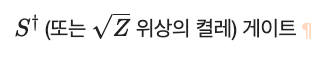

In [115]:
qc = QuantumCircuit(q)
qc.sdg(q)
qc.draw()

┌─────┐
q38: ┤ Sdg ├
     └─────┘

In [116]:
job = backend.run(qobj=transpile(circuits=qc, backend=backend))
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.-1.j]])

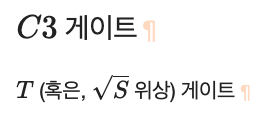

In [117]:
qc = QuantumCircuit(q)
qc.t(qubit=q)
qc.draw()

┌───┐
q38: ┤ T ├
     └───┘

In [118]:
job = backend.run(qobj=transpile(circuits=qc, backend=backend))
job.result().get_unitary(qc, decimals=3)

array([[1.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.707+0.707j]])

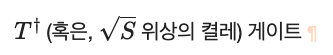

In [119]:
qc = QuantumCircuit(q)
qc.tdg(qubit=q)
qc.draw()

┌─────┐
q38: ┤ Tdg ├
     └─────┘

In [120]:
job = backend.run(qobj=transpile(circuits=qc, backend=backend))
job.result().get_unitary(qc, decimals=3)

array([[1.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.707-0.707j]])

**표준회전**

X축에 관한 회전

In [121]:
qc = QuantumCircuit(q)
qc.rx(theta=pi/2, qubit=q)
qc.draw()

┌─────────┐
q38: ┤ Rx(π/2) ├
     └─────────┘

In [122]:
job = backend.run(qobj=transpile(circuits=qc, backend=backend))
job.result().get_unitary(qc, decimals=3)

array([[ 0.707+0.j   , -0.   -0.707j],
       [ 0.   -0.707j,  0.707+0.j   ]])

Y축에 관한 회전

In [123]:
qc = QuantumCircuit(q)
qc.ry(theta=pi/2, qubit=q)
qc.draw()

┌─────────┐
q38: ┤ Ry(π/2) ├
     └─────────┘

In [124]:
job = backend.run(qobj=transpile(circuits=qc, backend=backend))
job.result().get_unitary(qc, decimals=3)

array([[ 0.707+0.j, -0.707+0.j],
       [ 0.707+0.j,  0.707+0.j]])

Z축에 관한 회전

In [125]:
qc = QuantumCircuit(q)
qc.rz(phi=pi/2, qubit=q)
qc.draw()

┌─────────┐
q38: ┤ Rz(π/2) ├
     └─────────┘

In [126]:
job = backend.run(qobj=transpile(circuits=qc, backend=backend))
job.result().get_unitary(qc, decimals=3)

array([[0.707-0.707j, 0.   +0.j   ],
       [0.   +0.j   , 0.707+0.707j]])

**다중 큐비트 게이트**

두 큐비트 게이트
* 제어 파울리 게이트 (controlled Pauli gates)
* 제어 하다마드 게이트 (controlled Hadamard gate)
* 제어 회전 게이트 (controlled rotation gates)
* 제어 위상 게이트 (controlled phase gate)
* 제어 u3게이트 (controlled u3 gate)
* 교환 게이트 (swap gate)

세 큐비트 게이트
* Toffoli gate
* Fredkin gate

In [127]:
q = QuantumRegister(size = 2)

**제어 파울리 게이트(Controlled Pauli Gate)**

Controlled-X (또는, Controlled-NOT) 게이트

In [128]:
qc = QuantumCircuit(q)
qc.cx(control_qubit=q[0], target_qubit=q[1])
qc.draw()

q53_0: ──■──
       ┌─┴─┐
q53_1: ┤ X ├
       └───┘

In [129]:
job = backend.run(qobj=transpile(circuits=qc, backend=backend))
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]])

제어 Y 게이트 (Controlled Y Gate)¶

In [130]:
qc = QuantumCircuit(q)
qc.cy(control_qubit=q[0], target_qubit=q[1])
qc.draw()

q53_0: ──■──
       ┌─┴─┐
q53_1: ┤ Y ├
       └───┘

In [131]:
job = backend.run(qobj=transpile(circuits=qc, backend=backend))
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.-1.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+1.j, 0.+0.j, 0.+0.j]])

Controlled Z (위상 제어) 게이트

In [132]:
qc = QuantumCircuit(q)
qc.cz(control_qubit=q[0], target_qubit=q[1])
qc.draw()

q53_0: ─■─
        │ 
q53_1: ─■─

In [133]:
job = backend.run(qobj=transpile(circuits=qc, backend=backend))
job.result().get_unitary(qc, decimals=3)

array([[ 1.-0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  1.-0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  1.-0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j]])

조절된 Hadamard 게이트

In [136]:
qc = QuantumCircuit(q)
qc.ch(control_qubit=q[0], target_qubit=q[1])
qc.draw()

q53_0: ──■──
       ┌─┴─┐
q53_1: ┤ H ├
       └───┘

In [137]:
job = backend.run(qobj=transpile(circuits=qc, backend=backend))
job.result().get_unitary(qc, decimals=3)

array([[ 1.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.707+0.j,  0.   +0.j,  0.707-0.j],
       [ 0.   +0.j,  0.   +0.j,  1.   -0.j,  0.   +0.j],
       [ 0.   +0.j,  0.707+0.j,  0.   +0.j, -0.707+0.j]])

**회전 제어 게이트 (Controlled rotation gate)**

Z-축을 기준으로 한 회전 제어

In [138]:
qc = QuantumCircuit(q)
qc.crz(theta=pi/2, control_qubit=q[0], target_qubit=q[1])
qc.draw()

q53_0: ─────■─────
       ┌────┴────┐
q53_1: ┤ Rz(π/2) ├
       └─────────┘

In [139]:
job = backend.run(qobj=transpile(circuits=qc, backend=backend))
job.result().get_unitary(qc, decimals=3)

array([[1.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.707-0.707j, 0.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.   +0.j   , 1.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.707+0.707j]])

위상 제어 회전

In [140]:
qc = QuantumCircuit(q)
qc.cp(theta=pi/2, control_qubit=q[0], target_qubit=q[1])
qc.draw()

q53_0: ─■───────
        │P(π/2) 
q53_1: ─■───────

In [141]:
job = backend.run(qobj=transpile(circuits=qc, backend=backend))
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+1.j]])

제어 u 회전¶

In [143]:
qc = QuantumCircuit(q)
qc.cu(theta=pi/2, phi=pi/2, lam=pi/2, gamma=0, control_qubit=q[0], target_qubit=q[1])
qc.draw()

q53_0: ─────────■──────────
       ┌────────┴─────────┐
q53_1: ┤ U(π/2,π/2,π/2,0) ├
       └──────────────────┘

In [144]:
job = backend.run(qobj=transpile(circuits=qc, backend=backend))
job.result().get_unitary(qc, decimals=3)

array([[ 1.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ],
       [ 0.   +0.j   ,  0.707+0.j   ,  0.   +0.j   , -0.   -0.707j],
       [ 0.   +0.j   ,  0.   +0.j   ,  1.   +0.j   ,  0.   +0.j   ],
       [ 0.   +0.j   ,  0.   +0.707j,  0.   +0.j   , -0.707+0.j   ]])

교환 게이트(SWAP gate)

In [146]:
qc = QuantumCircuit(q)
qc.swap(qubit1=q[0], qubit2=q[1])
qc.draw()

q53_0: ─X─
        │ 
q53_1: ─X─

In [147]:
job = backend.run(qobj=transpile(circuits=qc, backend=backend))
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]])

**삼중 큐비트 게이트**

토폴리(Toffoli)게이트(ccx 게이트)

In [150]:
q = QuantumRegister(size=3)

In [151]:
qc = QuantumCircuit(q)
qc.ccx(control_qubit1=q[0], control_qubit2=q[1], target_qubit=q[2])
qc.draw()

q63_0: ──■──
         │  
q63_1: ──■──
       ┌─┴─┐
q63_2: ┤ X ├
       └───┘

In [152]:
job = backend.run(qobj=transpile(circuits=qc, backend=backend))
job.result().get_unitary(qc, decimals=3)

array([[1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])

교환 제어 게이트(프레드킨 게이트)(Controlled swap gate, Fredkin gate)

첫번째(LSB) 큐비트이 일 때 두번째와 세번째 큐비트를 교환


In [153]:
qc = QuantumCircuit(q)
qc.cswap(control_qubit=q[0], target_qubit1=q[1], target_qubit2=q[2])
qc.draw()

q63_0: ─■─
        │ 
q63_1: ─X─
        │ 
q63_2: ─X─

In [154]:
job = backend.run(qobj=transpile(circuits=qc, backend=backend))
job.result().get_unitary(qc, decimals=3)

array([[1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j]])

비 유니테리 연산들 (Non-unitary operations)¶


In [155]:
q = QuantumRegister(size=1)
c = ClassicalRegister(size=1)

In [160]:
qc = QuantumCircuit(q, c)
qc.measure(qubit=q, cbit=c)
qc.draw()

┌─┐
 q66: ┤M├
      └╥┘
c0: 1/═╩═
       0

In [163]:
backend = BasicAer.get_backend(name='qasm_simulator')
job = backend.run(transpile(circuits=qc, backend=backend))
job.result().get_counts(qc)

{'0': 1024}

이 시뮬레이터는 100퍼센트 확률로 고전적인 레지스터의 값이 0 임을 예측한다.

In [164]:
qc = QuantumCircuit(q, c)
qc.h(q)
qc.measure(qubit=q, cbit=c)
qc.draw()

┌───┐┌─┐
 q66: ┤ H ├┤M├
      └───┘└╥┘
c0: 1/══════╩═
            0

In [165]:
job = backend.run(transpile(circuits=qc, backend=backend))
job.result().get_counts(qc)

{'1': 527, '0': 497}

이 시뮬레이터는 50퍼센트 확률로 고전적인 레지스터의 값이 0이거나 1임을 예측한다.



초기화 (Reset)

In [166]:
qc = QuantumCircuit(q, c)
qc.reset(qubit=q[0])
qc.measure(qubit=q, cbit=c)
qc.draw()

┌─┐
 q66: ─|0>─┤M├
           └╥┘
c0: 1/══════╩═
            0

In [167]:
job = backend.run(transpile(circuits=qc, backend=backend))
job.result().get_counts(qc)

{'0': 1024}

In [168]:
qc = QuantumCircuit(q, c)
qc.h(qubit=q)
qc.reset(qubit=q[0])
qc.measure(qubit=q, cbit=c)
qc.draw()

┌───┐     ┌─┐
 q66: ┤ H ├─|0>─┤M├
      └───┘     └╥┘
c0: 1/═══════════╩═
                 0

In [169]:
job = backend.run(transpile(circuits=qc, backend=backend))
job.result().get_counts(qc)

{'0': 1024}

**조건 연산자¶**

고전적인 레지스터의 상태에 따라 연산을 하는 것도 가능하다.

In [172]:
qc = QuantumCircuit(q, c)
qc.x(qubit=q[0]).c_if(c, 0)
qc.measure(qubit=q, cbit=c)
qc.draw()

┌───┐ ┌─┐
 q66: ─┤ X ├─┤M├
       └─╥─┘ └╥┘
      ┌──╨──┐ ║ 
c0: 1/╡ 0x0 ╞═╩═
      └─────┘ 0

In [173]:
job = backend.run(transpile(circuits=qc, backend=backend))
job.result().get_counts(qc)

{'1': 1024}

In [177]:
qc = QuantumCircuit(q, c)
qc.h(q)
qc.measure(qubit=q, cbit=c)
qc.x(qubit=q[0]).c_if(c, 0)
qc.measure(qubit=q, cbit=c)
qc.draw()

┌───┐┌─┐ ┌───┐ ┌─┐
 q66: ┤ H ├┤M├─┤ X ├─┤M├
      └───┘└╥┘ └─╥─┘ └╥┘
            ║ ┌──╨──┐ ║ 
c0: 1/══════╩═╡ 0x0 ╞═╩═
            0 └─────┘ 0

In [178]:
job = backend.run(transpile(circuits=qc, backend=backend))
job.result().get_counts(qc)

{'1': 1024}

임의 초기화

In [180]:
# Initializing a three-qubit quantum state

import math
desired_vector = [
    1 / math.sqrt(16) * complex(0, 1),
    1 / math.sqrt(8)  * complex(1, 0),
    1 / math.sqrt(16) * complex(1, 1),
    0,
    0,
    1 / math.sqrt(8)  * complex(1, 2),
    1 / math.sqrt(16) * complex(1, 0),
    0 
]

q = QuantumRegister(size=3)

qc = QuantumCircuit(q)

qc.initialize(desired_vector, qubits=[q[0], q[1], q[2]])
qc.draw()

┌───────────────────────────────────────────────────────────────────┐
q82_0: ┤0                                                                  ├
       │                                                                   │
q82_1: ┤1 Initialize(0.25j,0.35355,0.25+0.25j,0,0,0.35355+0.70711j,0.25,0) ├
       │                                                                   │
q82_2: ┤2                                                                  ├
       └───────────────────────────────────────────────────────────────────┘

In [183]:
backend = BasicAer.get_backend(name='statevector_simulator')
job = backend.run(transpile(circuits=qc, backend=backend))
qc_state = job.result().get_statevector(qc)
qc_state

array([1.38777878e-16+2.50000000e-01j, 3.53553391e-01-1.24900090e-16j,
       2.50000000e-01+2.50000000e-01j, 0.00000000e+00+0.00000000e+00j,
       0.00000000e+00+0.00000000e+00j, 3.53553391e-01+7.07106781e-01j,
       2.50000000e-01-8.32667268e-17j, 0.00000000e+00+0.00000000e+00j])

In [184]:
state_fidelity(state1=desired_vector, state2=qc_state)

1.0000000000000004

In [185]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright